# Generic Backend
Generate simulated distributed backend with no noise from the coupling map

In [2]:
# Import function to build coupling map from file
from distributed_coupling_map import (
    build_coupling_list_ring,
    build_coupling_list_line,
    build_coupling_list_grid,
    build_coupling_list_t_horizontal,
    build_coupling_list_t_vertical,
)

In [16]:
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import CouplingMap
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_circuit_layout, plot_coupling_map, plot_histogram

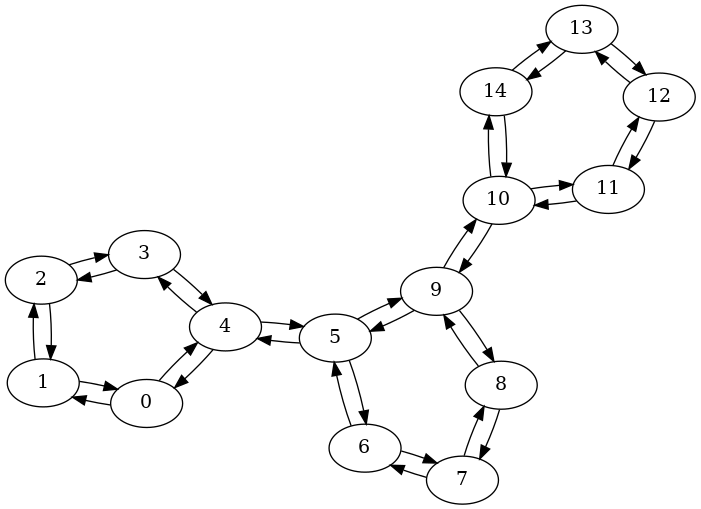

In [8]:
# coupling map structure ring
num_qubits = 5
num_group = 3

coupling_list_ring = build_coupling_list_ring(num_qubits, num_group)
cm_ring = CouplingMap(couplinglist=coupling_list_ring)
display(cm_ring.draw())

# Example

Build `GenericBackendV2` with provided coupling map

In [9]:
gen_backend = GenericBackendV2(num_qubits=num_qubits * num_group, coupling_map=cm_ring.get_edges())

Run a quantum circuit with GHZ state on 3 virtual qubits

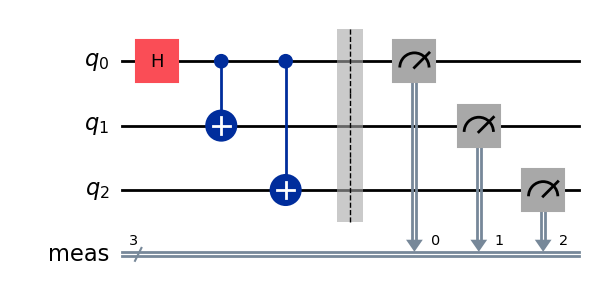

In [21]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure_all()
display(qc.draw('mpl'))

Plot virtual on physical qubits:


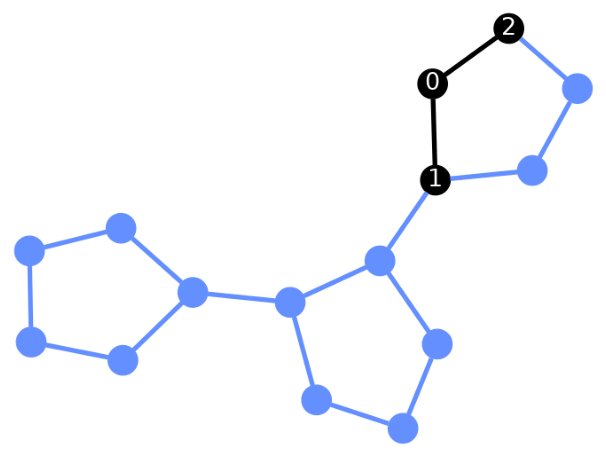

Plot used physical qubits:


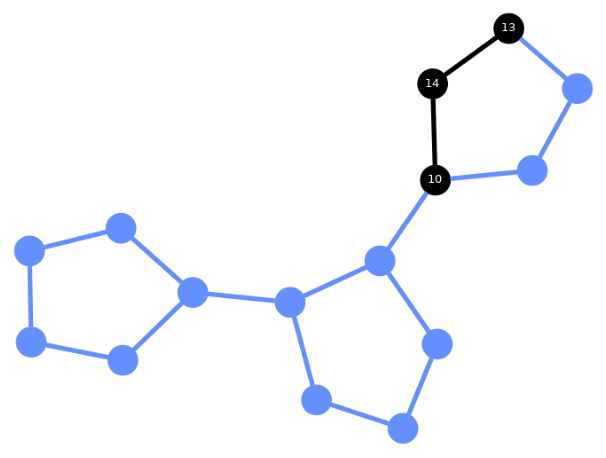

In [23]:
transpiled_qc = transpile(qc, gen_backend)
print("Plot virtual on physical qubits:")
display(plot_circuit_layout(transpiled_qc, gen_backend, view='virtual'))
print("Plot used physical qubits:")
display(plot_circuit_layout(transpiled_qc, gen_backend, view='physical'))

/home/user/.local/lib/python3.10/site-packages/qiskit/providers/fake_provider/generic_backend_v2.py:511: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


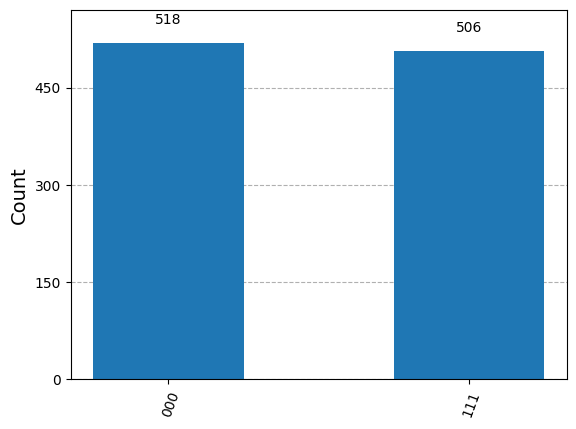

In [24]:
job = gen_backend.run(transpiled_qc)
counts = job.result().get_counts()
display(plot_histogram(counts))